In [1]:
!pip install cartopy
!pip install arm-pyart
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install netCDF4

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev is already the newest version (4.9.3-2).
proj-bin is already the newest version (4.9.3-2).
proj-data is already the newest version (4.9.3-2).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [2]:
!pip install shapely pyshp
!pip install --no-binary shapely shapely --force



  Using cached https://files.pythonhosted.org/packages/44/ec/4eddbf9d17a917c51fb4ad159aa7137f506681e91ab559cf87d120e1d78d/Shapely-1.7.0.tar.gz
Skipping wheel build for shapely, due to binaries being disabled for it.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Shapely 1.7.0
    Uninstalling Shapely-1.7.0:
      Successfully uninstalled Shapely-1.7.0
    Running setup.py install for shapely ... done


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pyart


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/usr/local/lib/python3.6/dist-packages/_pytest/mark/structures.py:426: DeprecationWarning: The usage of `cmp` is deprecated and will be removed on or after 2021-06-01.  Please use `eq` and `order` instead.
  @attr.s(cmp=False, hash=False)


In [4]:
# Baixando o repositório do Github
!wget https://github.com/vlsantos-bit/Exemplos_radar_livro-1/archive/master.zip

--2020-05-11 18:28:18--  https://github.com/vlsantos-bit/Exemplos_radar_livro-1/archive/master.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/vlsantos-bit/Exemplos_radar_livro-1/zip/master [following]
--2020-05-11 18:28:19--  https://codeload.github.com/vlsantos-bit/Exemplos_radar_livro-1/zip/master
Resolving codeload.github.com (codeload.github.com)... 140.82.113.9
Connecting to codeload.github.com (codeload.github.com)|140.82.113.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip.1’

master.zip.1            [    <=>             ] 973.76K   926KB/s    in 1.1s    

2020-05-11 18:28:21 (926 KB/s) - ‘master.zip.1’ saved [997133]



In [5]:
# Descompactando repositório para o Colab (arquivo formato zip)
!unzip master.zip

Archive:  master.zip
ced1846344c902d1d20bc35b732de318e218fd85
replace Exemplos_radar_livro-1-master/LICENSE? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Exemplos_radar_livro-1-master/LICENSE  
  inflating: Exemplos_radar_livro-1-master/PEL191215063034.RAWBPKC  
  inflating: Exemplos_radar_livro-1-master/Plot_Radar image in Google Colab.ipynb  
  inflating: Exemplos_radar_livro-1-master/README.md  


In [0]:
# Abrindo e realizando a leitura do arquivo
filename = 'Exemplos_radar_livro-1-master/PEL191215063034.RAWBPKC'
radar = pyart.io.read(filename)

/usr/local/lib/python3.6/dist-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.6/dist-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_1_states_provinces_lines.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


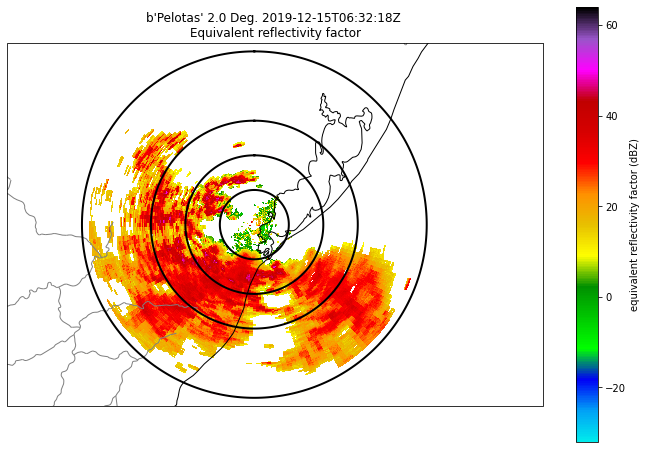

In [7]:
# Definindo a projeção e incluindo as lat e lon de onde esta o radar.

projection = ccrs.Orthographic(
    central_longitude=radar.longitude['data'][0],
    central_latitude=radar.latitude['data'][0])

# Definindo tamanho da imagem 

fig = plt.figure(figsize = (12,8))

# Criando o gráfico de campo do radar

dc = pyart.graph.RadarMapDisplay(radar)
ax = fig.add_subplot(111, projection=projection)

# Configurando o produto de refletividade do radar atribuindo seus valores máximos e mínimos.
# Configurando lat e lon para projeção do ccrs.Orthographic 

dc.plot_ppi_map('reflectivity',3, vmin= -32, vmax=64., min_lon=-56, max_lon=-48, min_lat=-34, max_lat=-29.3, cmap='pyart_NWSRef',
                ax=ax, fig=fig, resolution='10m')

#Configurando os circulos projetados nas imagens
dc.plot_range_rings([50, 100, 150, 250])

#plotar a figura

plt.show()

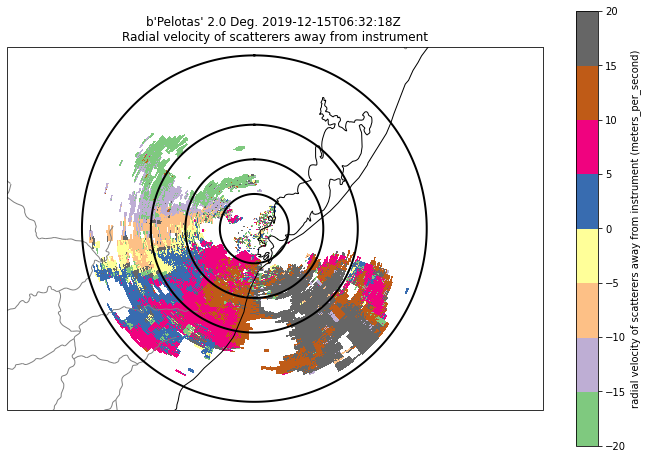

In [11]:
# Definindo a projeção e incluindo as lat e lon de onde esta o radar.

projection = ccrs.Orthographic(
    central_longitude=radar.longitude['data'][0],
    central_latitude=radar.latitude['data'][0])

# Definindo tamanho da imagem 

fig = plt.figure(figsize = (12,8))

# Criando o gráfico de campo do radar

dc = pyart.graph.RadarMapDisplay(radar)
ax = fig.add_subplot(111, projection=projection)

# Configurando o produto de refletividade do radar atribuindo seus valores máximos e mínimos.
# Configurando lat e lon para projeção do ccrs.Orthographic 

dc.plot_ppi_map('velocity',3, vmin= -20, vmax=20., min_lon=-56, max_lon=-48, min_lat=-34, max_lat=-29.3, cmap='Accent',
                ax=ax, fig=fig, resolution='10m')

#Configurando os circulos projetados nas imagens
dc.plot_range_rings([50, 100, 150, 250])

#plotar a figura

plt.show()